In [ ]:
#handled outliers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/train_ctrUa4K.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data_copy=data.copy()

In [ ]:
test= pd.read_csv('/content/test_lAUu6dG.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
test_copy=test.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.shape

(614, 13)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
test.shape

(367, 12)

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

EXPLORATORY DATA ANALYSIS

**PRE** **PROCESSING**

Missing Values

In [ ]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [ ]:
data['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [ ]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [ ]:
data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [ ]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [ ]:
data['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [ ]:
data['Gender']= data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']= data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']= data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']= data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Loan_Amount_Term']= data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History']= data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [ ]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
test['Gender']= test['Gender'].fillna(test['Gender'].mode()[0])
test['Married']= test['Married'].fillna(test['Married'].mode()[0])
test['Dependents']= test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed']= test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])
test['Loan_Amount_Term']= test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])
test['Credit_History']= test['Credit_History'].fillna(test['Credit_History'].mode()[0])

In [ ]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())

In [ ]:
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median())

In [ ]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Outlier

In [ ]:
data['Total_income']=data['ApplicantIncome']+data['CoapplicantIncome']

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


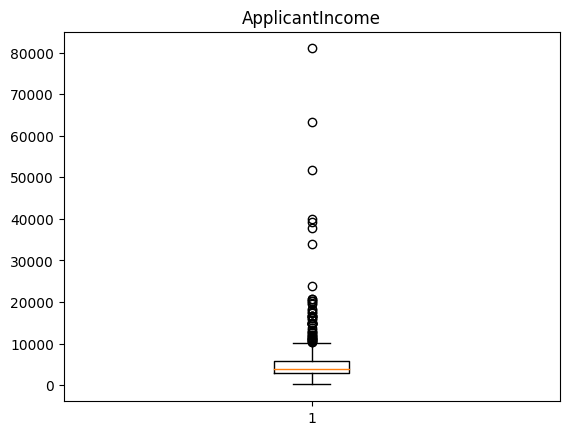

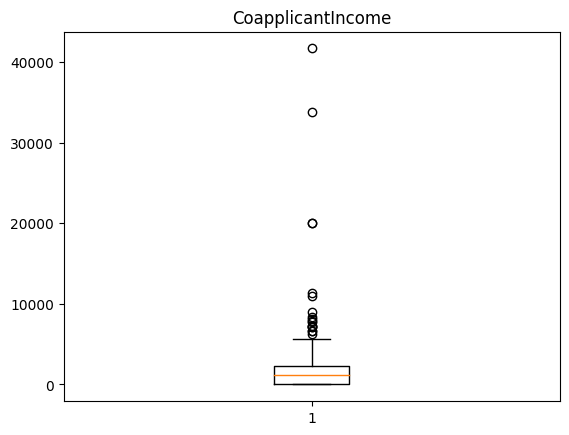

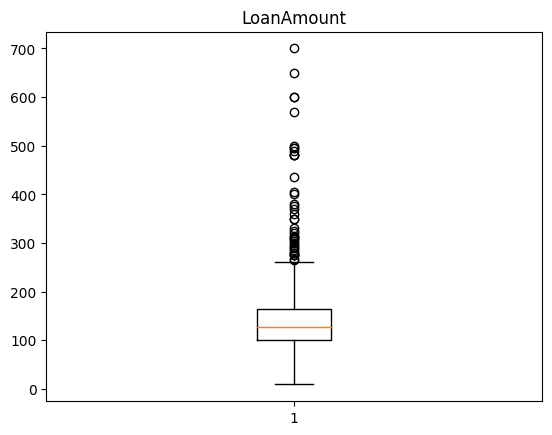

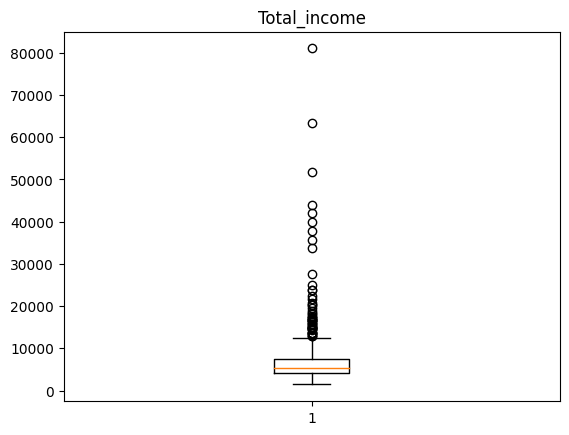

In [ ]:
col=['ApplicantIncome','CoapplicantIncome','LoanAmount','Total_income']
for i in col:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [ ]:
test['Total_income']=test['ApplicantIncome']+test['CoapplicantIncome']

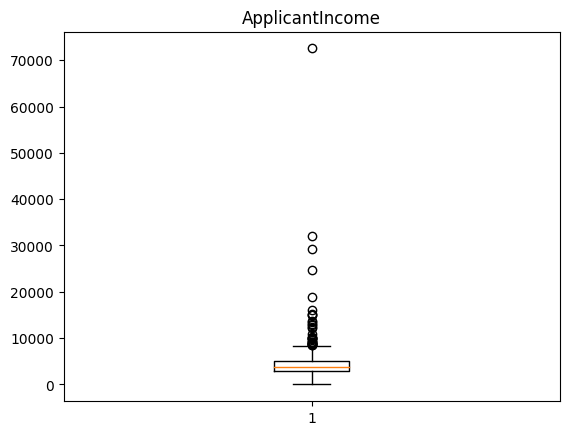

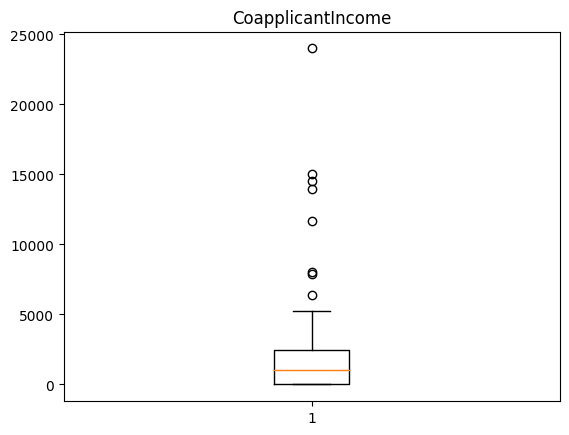

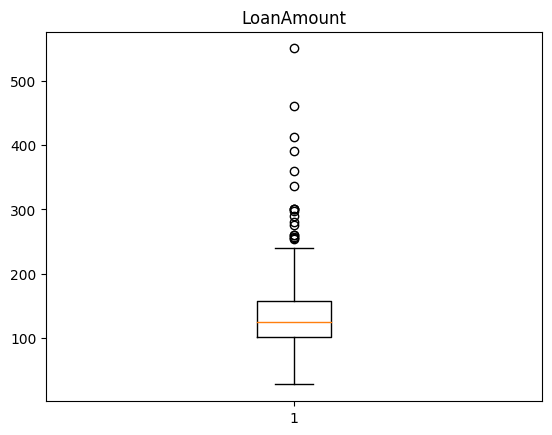

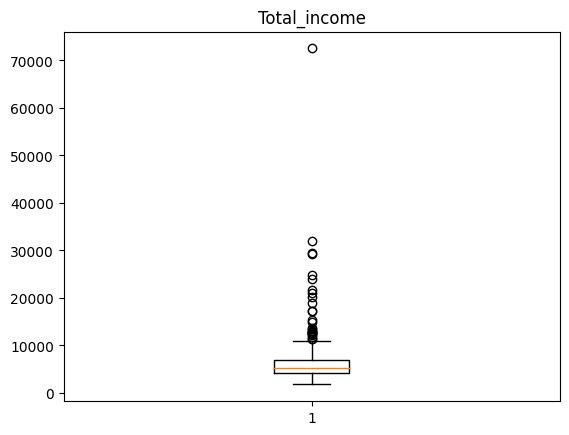

In [ ]:
test_col=['ApplicantIncome','CoapplicantIncome','LoanAmount','Total_income']
for i in test_col:
  plt.figure()
  plt.boxplot(test[i])
  plt.title(i)

In [ ]:
#handlng outlier in loan amount in train data

In [ ]:
la_q1 = data['LoanAmount'].quantile(0.25)
la_q3 = data['LoanAmount'].quantile(0.75)

In [ ]:
print('Q1 is',la_q1)
print('Q3 is',la_q3)

Q1 is 100.25
Q3 is 164.75


In [ ]:
la_IQR = la_q3-la_q1
print('IQR is',la_IQR)

IQR is 64.5


In [ ]:
la_low_lim=la_q1-1.5*la_IQR
la_upp_lim=la_q3+1.5*la_IQR
print('Lower limit is',la_low_lim)
print('Upper limit is',la_upp_lim)

Lower limit is 3.5
Upper limit is 261.5


In [ ]:
#Finding outliers
la_outlier=[]
for x in data['LoanAmount']:
  if((x>la_upp_lim) | (x<la_low_lim)):
    la_outlier.append(x)
la_outlier

[267.0,
 349.0,
 315.0,
 320.0,
 286.0,
 312.0,
 265.0,
 370.0,
 650.0,
 290.0,
 600.0,
 275.0,
 700.0,
 495.0,
 280.0,
 279.0,
 304.0,
 330.0,
 436.0,
 480.0,
 300.0,
 376.0,
 490.0,
 308.0,
 570.0,
 380.0,
 296.0,
 275.0,
 360.0,
 405.0,
 500.0,
 480.0,
 311.0,
 480.0,
 400.0,
 324.0,
 600.0,
 275.0,
 292.0,
 350.0,
 496.0]

In [ ]:
#Capping outliers to upper limit and lower limit
data['LoanAmount'] = data['LoanAmount'].clip(lower=la_low_lim,upper=la_upp_lim)

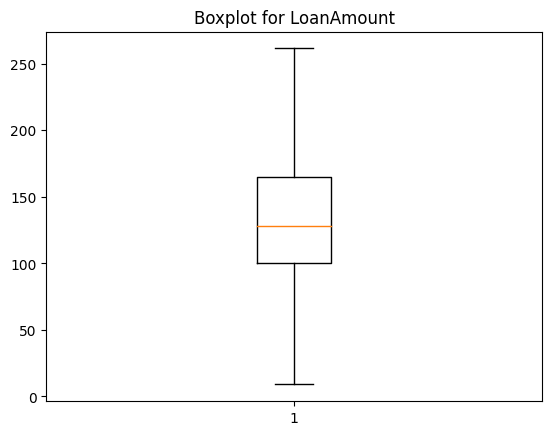

In [ ]:
plt.boxplot(data['LoanAmount'])
plt.title('Boxplot for LoanAmount')
plt.show()

In [ ]:
#handling outliers of loan amount in test data

In [ ]:
lat_q1 = test['LoanAmount'].quantile(0.25)
lat_q3 = test['LoanAmount'].quantile(0.75)

In [ ]:
print('Q1 is',lat_q1)
print('Q3 is',lat_q3)

Q1 is 101.0
Q3 is 157.5


In [ ]:
lat_IQR = lat_q3-lat_q1
print('IQR is',la_IQR)

IQR is 64.5


In [ ]:
lat_low_lim=lat_q1-1.5*la_IQR
lat_upp_lim=lat_q3+1.5*lat_IQR
print('Lower limit is',lat_low_lim)
print('Upper limit is',lat_upp_lim)

Lower limit is 4.25
Upper limit is 242.25


In [ ]:
#Finding outliers
lat_outlier=[]
for x in test['LoanAmount']:
  if((x>lat_upp_lim) | (x<lat_low_lim)):
    lat_outlier.append(x)
lat_outlier

[280.0,
 300.0,
 290.0,
 275.0,
 360.0,
 257.0,
 390.0,
 256.0,
 300.0,
 550.0,
 260.0,
 336.0,
 412.0,
 460.0,
 297.0,
 300.0,
 260.0,
 254.0]

In [ ]:
#Capping outliers to upper limit and lower limit
test['LoanAmount'] = test['LoanAmount'].clip(lower=lat_low_lim,upper=lat_upp_lim)

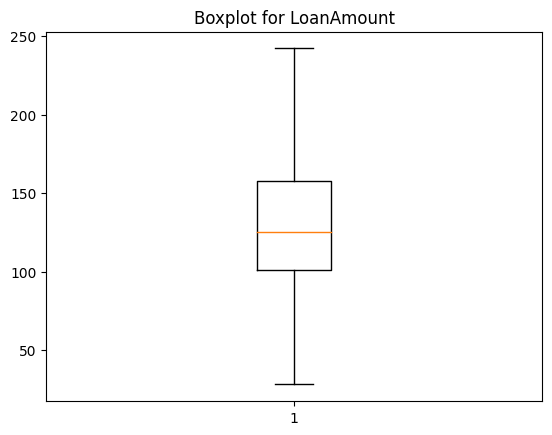

In [ ]:
plt.boxplot(test['LoanAmount'])
plt.title('Boxplot for LoanAmount')
plt.show()

In [ ]:
# Handling outliers for Total_income in train data

In [ ]:
ti_q1 = data['Total_income'].quantile(0.25)
ti_q3 = data['Total_income'].quantile(0.75)

In [ ]:
print('Q1 is',ti_q1)
print('Q3 is',ti_q3)

Q1 is 4166.0
Q3 is 7521.75


In [ ]:
ti_IQR = ti_q3-ti_q1
print('IQR is',ti_IQR)

IQR is 3355.75


In [ ]:
ti_low_lim=ti_q1-1.5*ti_IQR
ti_upp_lim=ti_q3+1.5*ti_IQR
print('Lower limit is',ti_low_lim)
print('Upper limit is',ti_upp_lim)

Lower limit is -867.625
Upper limit is 12555.375


In [ ]:
#Finding outliers
ti_outlier=[]
for x in data['Total_income']:
  if((x>ti_upp_lim) | (x<ti_low_lim)):
    ti_outlier.append(x)
ti_outlier

[23809.0,
 15500.0,
 13650.0,
 14583.0,
 23803.0,
 14363.0,
 20166.0,
 14999.0,
 14866.0,
 39999.0,
 51763.0,
 16816.0,
 13650.0,
 33846.0,
 43897.0,
 16250.0,
 16783.0,
 14583.0,
 20667.0,
 20233.0,
 15000.0,
 13649.0,
 63337.0,
 12917.0,
 24996.0,
 15759.0,
 17196.0,
 13746.0,
 22500.0,
 81000.0,
 21600.0,
 14880.0,
 12876.0,
 37719.0,
 15666.0,
 16692.0,
 17539.0,
 18917.0,
 18333.0,
 17263.0,
 27500.0,
 13262.0,
 15114.0,
 17500.0,
 18165.0,
 19484.0,
 16666.0,
 35673.0,
 16120.0,
 42083.0]

In [ ]:
#Capping outliers to upper limit and lower limit
data['Total_income'] = data['Total_income'].clip(lower=ti_low_lim,upper=ti_upp_lim)

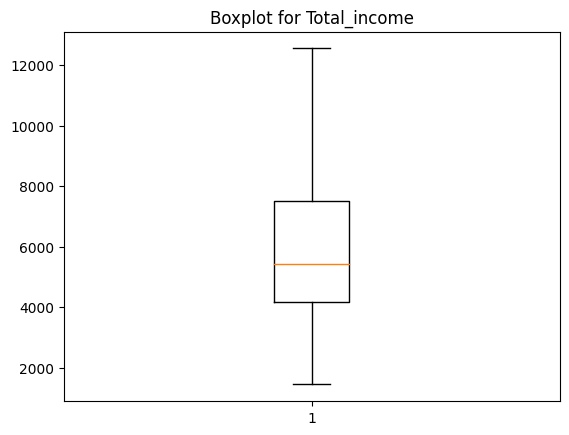

In [ ]:
plt.boxplot(data['Total_income'])
plt.title('Boxplot for Total_income')
plt.show()

In [ ]:
# Handling outliers for Total_income in test data

In [ ]:
tit_q1 = test['Total_income'].quantile(0.25)
tit_q3 = test['Total_income'].quantile(0.75)

In [ ]:
print('Q1 is',tit_q1)
print('Q3 is',tit_q3)

Q1 is 4156.0
Q3 is 6980.0


In [ ]:
tit_IQR = tit_q3-tit_q1
print('IQR is',tit_IQR)

IQR is 2824.0


In [ ]:
tit_low_lim=tit_q1-1.5*tit_IQR
tit_upp_lim=tit_q3+1.5*tit_IQR
print('Lower limit is',tit_low_lim)
print('Upper limit is',tit_upp_lim)

Lower limit is -80.0
Upper limit is 11216.0


In [ ]:
#Finding outliers
tit_outlier=[]
for x in test['Total_income']:
  if((x>tit_upp_lim) | (x<tit_low_lim)):
    tit_outlier.append(x)
tit_outlier

[13633,
 12173,
 17142,
 24000,
 11250,
 11379,
 72529,
 12635,
 13518,
 12500,
 32000,
 12941,
 15312,
 13083,
 11841,
 12690,
 29418,
 20149,
 18840,
 24797,
 29167,
 21666,
 12333,
 14987,
 21000,
 17283,
 12805]

In [ ]:
#Capping outliers to upper limit and lower limit
test['Total_income'] = test['Total_income'].clip(lower=tit_low_lim,upper=tit_upp_lim)

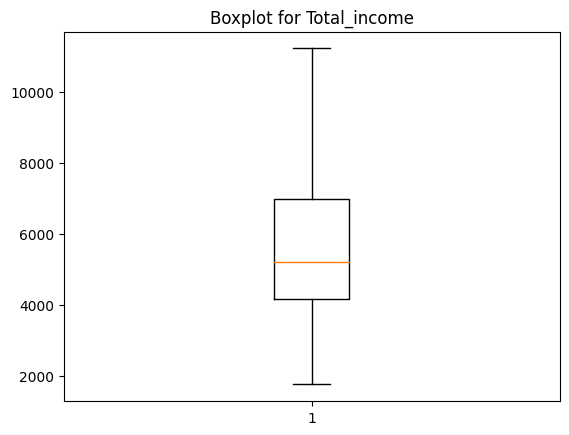

In [ ]:
plt.boxplot(test['Total_income'])
plt.title('Boxplot for Total_income')
plt.show()

Encoding

In [ ]:
#Label Encoding is used to encode target variable(Loan_Status)
from sklearn.preprocessing import LabelEncoder

label_en = LabelEncoder()

In [ ]:
data['Loan_Status'] = label_en.fit_transform(data['Loan_Status'])

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


In [ ]:
data=data.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [ ]:
data = pd.get_dummies(data, dtype=int)
test = pd.get_dummies(test, dtype=int)


In [ ]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_income,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,5849.0,0,1,1,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,6091.0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,3000.0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,4941.0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,6000.0,0,1,1,...,0,0,0,1,0,1,0,0,0,1


In [ ]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,5720,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4576,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,6800,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4886,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,3276,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1


In [ ]:
data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Total_income',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [ ]:
y = data['Loan_Status']
X = data.drop(['ApplicantIncome','CoapplicantIncome','Loan_Status'],axis=1)

In [ ]:
test=test.drop(['ApplicantIncome','CoapplicantIncome'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
test=scaler.fit_transform(test)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_pred_lr = log_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score ,precision_score , recall_score,f1_score

In [ ]:
print('Logstic Regression Accuracy is', accuracy_score(y_test, y_pred_lr))

Logstic Regression Accuracy is 0.7886178861788617


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(1,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

metric_k

[0.6585365853658537,
 0.6504065040650406,
 0.6910569105691057,
 0.6829268292682927,
 0.6829268292682927,
 0.6666666666666666,
 0.7235772357723578,
 0.7073170731707317,
 0.7317073170731707,
 0.7154471544715447,
 0.7073170731707317,
 0.7154471544715447,
 0.6991869918699187,
 0.7235772357723578]

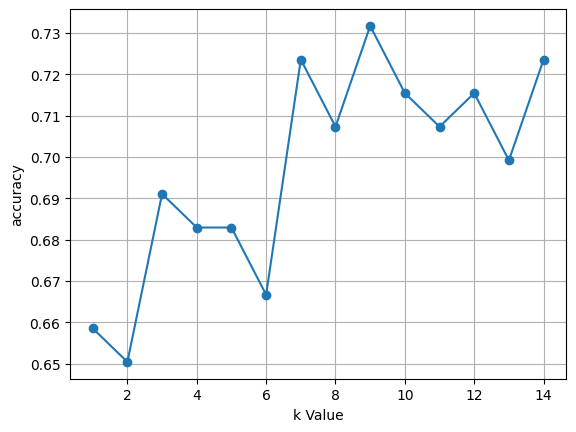

In [ ]:

#plotting k vs accuracy to know which k gives maximum accuracy
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)

In [ ]:
print('KNN Accuracy is', accuracy_score(y_test, y_pred_knn))

KNN Accuracy is 0.7317073170731707


In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train , y_train)
y_pred_svm= svm_clf.predict(X_test)

In [ ]:
print('SVM Accuracy is', accuracy_score(y_test, y_pred_svm))

SVM Accuracy is 0.7886178861788617


In [ ]:
from sklearn.tree import DecisionTreeClassifier
ds_clf= DecisionTreeClassifier(criterion='entropy')
ds_clf.fit(X_train, y_train)
y_pred_dt = ds_clf.predict(X_test)

In [ ]:
print('Decision Tree Accuracy is', accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy is 0.6747967479674797


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [ ]:
print('Random Forest Accuracy is', accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy is 0.7560975609756098


In [ ]:
X.columns

Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_income',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [ ]:
pred_test_svm = svm_clf.predict(test)

In [ ]:
pred_test_svm

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
pred_test_lr = log_model.predict(test)

In [ ]:
sub=pd.read_csv('/content/sample_submission_49d68Cx.csv')

In [ ]:
print('Logstic Regression Accuracy is', accuracy_score(y_test, y_pred_lr))
print('KNN Accuracy is', accuracy_score(y_test, y_pred_knn))
print('SVM Accuracy is', accuracy_score(y_test, y_pred_svm))
print('Decision Tree Accuracy is', accuracy_score(y_test, y_pred_dt))
print('Random Forest Accuracy is', accuracy_score(y_test, y_pred_rf))

Logstic Regression Accuracy is 0.7886178861788617
KNN Accuracy is 0.7317073170731707
SVM Accuracy is 0.7886178861788617
Decision Tree Accuracy is 0.6747967479674797
Random Forest Accuracy is 0.7560975609756098


In [ ]:
sub_svm=sub.copy()

In [ ]:
sub_svm.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [ ]:
sub_svm['Loan_Status']=pred_test_svm
sub_svm['Loan_ID']=test_copy['Loan_ID']

In [ ]:
sub_svm['Loan_Status'].replace(0, 'N',inplace=True)
sub_svm['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
pd.DataFrame(sub_svm, columns=['Loan_ID','Loan_Status']).to_csv('loan_prediction2.csv',index=False)

In [ ]:
sub_svm.shape

(367, 2)

In [ ]:
sub.shape

(367, 2)

In [ ]:
sub_lr=sub.copy()

In [ ]:
sub_lr['Loan_Status']=pred_test_lr
sub_lr['Loan_ID']=test_copy['Loan_ID']

In [ ]:
sub_lr['Loan_Status'].replace(0, 'N',inplace=True)
sub_lr['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
pd.DataFrame(sub_lr, columns=['Loan_ID','Loan_Status']).to_csv('loan_prediction4.csv',index=False)

In [ ]:
pred_test_knn = classifier.predict(test)

In [ ]:
sub_knn=sub.copy()

In [ ]:
sub_knn['Loan_Status']=pred_test_knn
sub_knn['Loan_ID']=test_copy['Loan_ID']

In [ ]:
sub_knn['Loan_Status'].replace(0, 'N',inplace=True)
sub_knn['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
pd.DataFrame(sub_knn, columns=['Loan_ID','Loan_Status']).to_csv('loan_prediction5.csv',index=False)

In [ ]:
pred_test_dt = ds_clf.predict(test)

In [ ]:
sub_dt=sub.copy()

In [ ]:
sub_dt['Loan_Status']=pred_test_knn
sub_dt['Loan_ID']=test_copy['Loan_ID']

In [ ]:
sub_dt['Loan_Status'].replace(0, 'N',inplace=True)
sub_dt['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
pd.DataFrame(sub_dt, columns=['Loan_ID','Loan_Status']).to_csv('loan_prediction6.csv',index=False)

In [ ]:
pred_test_dt = rf_clf.predict(test)

In [ ]:
sub_rf=sub.copy()

In [ ]:
sub_rf['Loan_Status']=pred_test_knn
sub_rf['Loan_ID']=test_copy['Loan_ID']

In [ ]:
sub_rf['Loan_Status'].replace(0, 'N',inplace=True)
sub_rf['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
pd.DataFrame(sub_rf, columns=['Loan_ID','Loan_Status']).to_csv('loan_prediction7.csv',index=False)